### MovieLens Dataset

In [1]:
!rm ml-100k.zip
!rm -rf ml-100k
!wget -O ml-100k.zip http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

rm: cannot remove ‘ml-100k.zip’: No such file or directory
--2020-10-19 15:53:07--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  13.2MB/s    in 0.4s    

2020-10-19 15:53:07 (13.2 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  infla

In [2]:
import pandas as pd 
user_path = './ml-100k/u.user'
item_path = './ml-100k/u.item'
user_item = './ml-100k/u.data'

user_df = pd.read_csv(user_path, names=['uid','age','gender','occupation','zipcode'],  sep='|')
user_df.head()

,uid,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
genres = ['unknown','Action' , 'Adventure', 'Animation', 'Childrens' , 'Comedy' , 'Crime', \
                                        'Documentary', 'Drama' ,'Fantasy' , 'Film-Noir' , 'Horror' , 'Musical', \
                                        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


item_df = pd.read_csv(item_path, names=['iid','title','release_date','video_release_date', 'imdb url'] + genres,  sep='|', encoding = "ISO-8859-1")



In [4]:
user_item_df = pd.read_csv(user_item, names=['iid', 'uid', 'rating', 'timestamp'], sep='\t')
user_item_df = user_item_df.merge(item_df, on=['iid'])
user_item_df = user_item_df.merge(user_df, on=['uid'])
user_item_df.head() 

,iid,uid,rating,timestamp,title,release_date,video_release_date,imdb url,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zipcode
0,196,242,3,881250949,Dead Poets Society (1989),01-Jan-1989,NaN,http://us.imdb.com/M/title-exact?Dead%20Poets%...,0,0,...,0,0,0,0,0,0,33,M,educator,31404
1,305,242,5,886307828,"Ice Storm, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ice+Storm%2C+...,0,0,...,0,0,0,0,0,0,33,M,educator,31404
2,6,242,4,883268170,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,...,0,0,0,0,0,0,33,M,educator,31404
3,234,242,4,891033261,Jaws (1975),01-Jan-1975,NaN,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,...,0,0,0,0,0,0,33,M,educator,31404
4,63,242,3,875747190,"Santa Clause, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Santa%20Claus...,0,0,...,0,0,0,0,0,0,33,M,educator,31404


### Observe - Gender v.s. Genre 

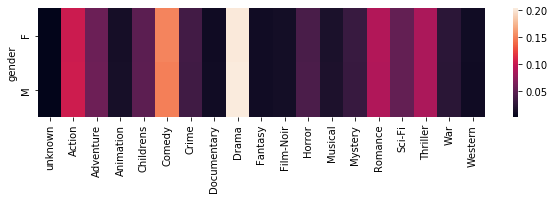

In [5]:
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heat_map(df, figsize=(10,7)): 
    df = df.div(df.sum(axis=1), axis=0)     
    plt.subplots(figsize=figsize)
    sns.heatmap(df)

gender = user_item_df[user_item_df['rating']>3][['gender']+genres].groupby(['gender']).sum()
plot_heat_map(gender, figsize=(10,2))
    

### Observe - Occupation v.s. Genre 

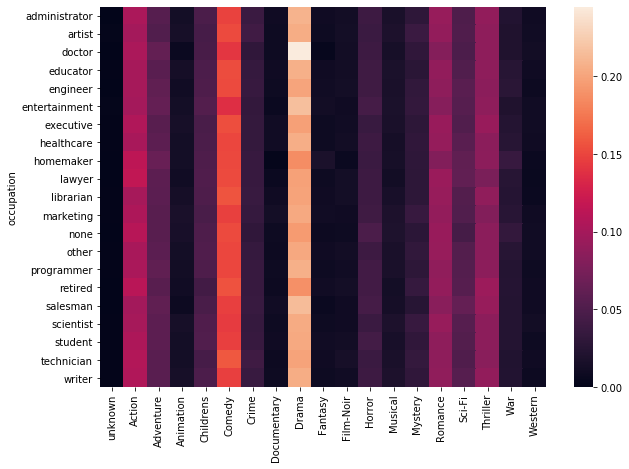

In [6]:
occupation = user_item_df[user_item_df['rating']>3][['occupation']+genres].groupby(['occupation']).sum()
plot_heat_map(occupation, figsize=(10,7))

### Observe - Age v.s. Genre 

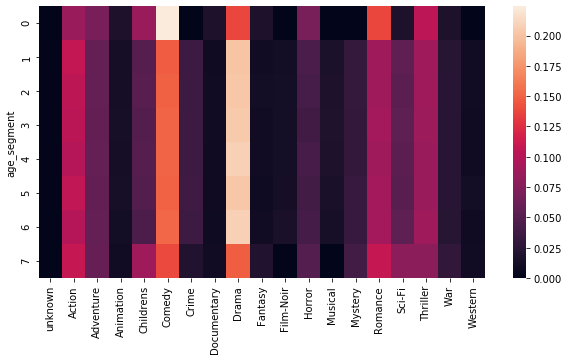

In [7]:
user_item_df['age_segment']=user_item_df['age']//10
age = user_item_df[user_item_df['rating']>3][['age_segment']+genres].groupby(['age_segment']).sum()
plot_heat_map(age, figsize=(10,5))

In [8]:
import pandas as pd 
genres = ['unknown','Action' , 'Adventure', 'Animation', 'Childrens' , 'Comedy' , 'Crime', \
                                        'Documentary', 'Drama' ,'Fantasy' , 'Film-Noir' , 'Horror' , 'Musical', \
                                        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


import re 
item_df = pd.read_csv(item_path, names=['iid','title','release_date','video_release_date', 'imdb url'] + genres,  sep='|', encoding = "ISO-8859-1")
def get_year(title):
    movie_year_p = re.compile('.*\((\d+)\)')
    m = re.search(movie_year_p, title)
    movie_year = -1
    try:
        movie_year = int(m.group(1))
    except:
        pass
    return movie_year



item_df['year'] = item_df.apply(lambda x: get_year(x['title']), axis=1)

item_df.head()




,iid,title,release_date,video_release_date,imdb url,unknown,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


### Prepare to insert into Elastic Search

In [9]:
!pip install requests 
!pip install Elasticsearch 
!pip install urllib3

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 219 kB 4.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [10]:
master_user="master_user"
master_user_password="master_user_password"
elastic_search_endpoint="elastic_search_endpoint"

In [11]:
import boto3
import json
from elasticsearch import Elasticsearch, RequestsHttpConnection
def connectES(esEndPoint):
    print ('Connecting to the ES Endpoint {0}'.format(esEndPoint))
    try:
        esClient = Elasticsearch(
        hosts=[{'host': esEndPoint, 'port': 443}],
        http_auth=(master_user, master_user_password),
        use_ssl=True,
        verify_certs=True,
        connection_class=RequestsHttpConnection)
        return esClient
    except Exception as E:
        print("Unable to connect to {0}".format(esEndPoint))
        print(E)
        exit(3)

In [12]:
esClient = connectES(elastic_search_endpoint)

Connecting to the ES Endpoint search-p13n-search-demo-gezwjq5aol2p7u2gvje4ni7oom.us-west-2.es.amazonaws.com


In [13]:
indexDoc = {
    "dataRecord":{
    "iid": {"type":"integer"},
    "title": {"type":"text", "index":"analyzed"},
    "release_date": {"type":"text", "index":False},
    "video_release_date": {"type":"text", "index":False},
    "imdb url": {"type":"text", "index":False},
    "unknown": {"type":"text", "index":False},
    "Action": {"type":"integer"},
    "Adventure": {"type":"integer"},
    "Animation": {"type":"integer"},
    "Childrens": {"type":"integer"},
    "Comedy": {"type":"integer"},
    "Crime": {"type":"integer"},
    "Documentary": {"type":"integer"},
    "Drama": {"type":"integer"},
    "Fantasy": {"type":"integer"},
    "Film-Noir": {"type":"integer"},
    "Horror": {"type":"integer"},
    "Musical": {"type":"integer"},
    "Mystery": {"type":"integer"},
    "Romance": {"type":"integer"},
    "Sci-Fi": {"type":"integer"},
    "Thriller": {"type":"integer"},
    "War": {"type":"integer"},
    "Western": {"type":"integer"},
    "year": {"type":"integer"}
},
"settings" : {
 "number_of_shards": 1,
 "number_of_replicas": 0
 }
}

In [14]:
def createIndex(esClient):
    try:
        res = esClient.indices.exists('movies')
        print("Index Exists ... {}".format(res))
        if res is False:
            esClient.indices.create('movies', body=indexDoc)
        return 1
    except Exception as E:
        print("Unable to Create Index {0}".format("movies"))
        print(E)
        exit(4)

In [15]:
def indexDocElement(esClient, response):
    try:
        retval = esClient.index(index='movies', doc_type='movie', body=response)
    except Exception as E:
        print("Doc not indexed")
        print("Error: ",E)
        exit(5)

In [16]:
content = {"iid": 18, "title": "White Balloon, The (1995)", "release_date": "01-Jan-1995", "video_release_date": "", "imdb url": "http://us.imdb.com/M/title-exact?Badkonake%20Sefid%20(1995)", "unknown": 0, "Action": 0, "Adventure": 0, "Animation": 0, "Childrens": 0, "Comedy": 0, "Crime": 0, "Documentary": 0, "Drama": 1, "Fantasy": 0, "Film-Noir": 0, "Horror": 0, "Musical": 0, "Mystery": 0, "Romance": 0, "Sci-Fi": 0, "Thriller": 0, "War": 0, "Western": 0, "year": 1995}

indexDocElement(esClient,content)

In [17]:
item_df = item_df.fillna("")
item_arr = item_df.to_dict(orient="records")
import json 
for i, j in enumerate(item_arr):
    indexDocElement(esClient,response=j)

In [18]:
import requests
r = requests.get('https://{}/movies/movie/_search?q=title:black&size=100'.format(elastic_search_endpoint), auth=(master_user, master_user_password))
rjson = r.json()
rjson 

{'took': 163,
 'timed_out': False,
 '_shards': {'total': 5, 'successful': 5, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 4, 'relation': 'eq'},
  'max_score': 5.9481115,
  'hits': [{'_index': 'movies',
    '_type': 'movie',
    '_id': 'JYmbQXUBGYXIlCpo7g8f',
    '_score': 5.9481115,
    '_source': {'iid': 389,
     'title': 'Black Beauty (1994)',
     'release_date': '01-Jan-1994',
     'video_release_date': '',
     'imdb url': 'http://us.imdb.com/Title?Black+Beauty+(1994/I)',
     'unknown': 0,
     'Action': 0,
     'Adventure': 1,
     'Animation': 0,
     'Childrens': 1,
     'Comedy': 0,
     'Crime': 0,
     'Documentary': 0,
     'Drama': 0,
     'Fantasy': 0,
     'Film-Noir': 0,
     'Horror': 0,
     'Musical': 0,
     'Mystery': 0,
     'Romance': 0,
     'Sci-Fi': 0,
     'Thriller': 0,
     'War': 0,
     'Western': 0,
     'year': 1994}},
   {'_index': 'movies',
    '_type': 'movie',
    '_id': 'VTWbQXUBE17jUbYW7c0b',
    '_score': 5.8836293,
    '_source': {

### Save user_item_df and item_df for later usage

In [19]:
user_item_df.to_pickle("user_item_df.p")
item_df.to_pickle("item_df.p")
